In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Linear Regression with Polynomial Curve Fitting	


In [17]:
#data loading
df = pd.read_csv('globalTemp.csv')
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()

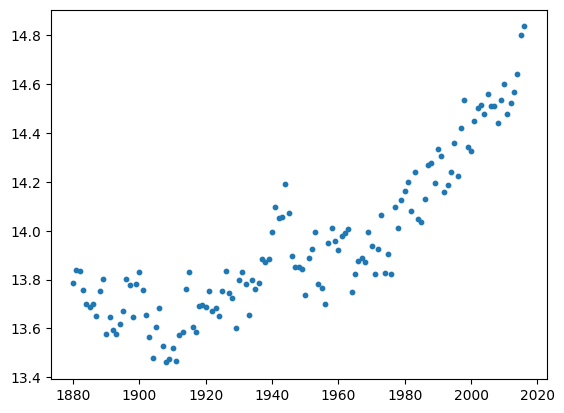

In [18]:
plt.scatter(x, y, s = 10)

In [22]:
# 用二阶多项式去拟合

order = 2 #多项式的阶数
X = np.array([x**i for i in range(order+1)]).T

Task: implement yourself linear regression using numpy

In [38]:
W =np.linalg.inv(X.T@X)@X.T@y
y_hat=X@W

Task: implement linear regression using the functions from sklearn

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [39]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
W_2= model.coef_
y_hat2=model.predict(X)

verify your answer with codes below

In [40]:
print("our weight = ", W)
print("sklearn weight = ", W_2)

our weight =  [ 2.96387019e+02 -2.96922880e-01  7.79627646e-05]
sklearn weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


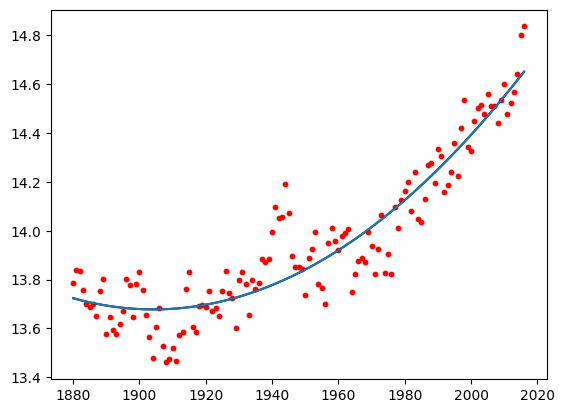

In [41]:
plt.scatter(x, y, s=10, c="r")
plt.plot(x, y_hat,c="k")
plt.plot(x, y_hat2)

## Linear Regression

In [43]:
N_SAMPLES = 500
N_FEATURES = 200
NOISE = 3
data = datasets.make_regression(n_samples=N_SAMPLES, 
                                n_features=N_FEATURES, 
                                n_informative=5, 
                                noise=NOISE, 
                                random_state=9961)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9961)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 200) (350,)
(150, 200) (150,)


Task: use numpy to implement linear regression via the normal equation, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [44]:
X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
W=np.linalg.inv(X_train.T@X_train)@X_train.T@y_train
L1=np.linalg.norm(W, ord=1)
L2=np.linalg.norm(W, ord=2)
X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
y_hat_train=X_train@W
y_hat_test=X_test@W
MSE_train=np.mean((y_train-y_hat_train)**2)
MSE_test=np.mean((y_test-y_hat_test)**2)

print("--- 第一个任务结果 ---")
print("L1 范数:", L1)
print("L2 范数:", L2)
print("训练集 MSE:", MSE_train)
print("测试集 MSE:", MSE_test)

--- 第一个任务结果 ---
L1 范数: 286.87235935436394
L2 范数: 128.1208077111621
训练集 MSE: 4.1203264236266275
测试集 MSE: 19.927518866078373


Task: use scikit-learn’s LinearRegression to fit the same model without an intercept, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
W_2= model.coef_
y_hat2_train=model.predict(X_train)
y_hat2_test=model.predict(X_test)
L1=np.linalg.norm(W_2, ord=1)
L2=np.linalg.norm(W_2, ord=2)
MSE_train=np.mean((y_train-y_hat2_train)**2)
MSE_test=np.mean((y_test-y_hat2_test)**2)


print("--- 第二个任务结果 ---")
print("L1 范数:", L1)
print("L2 范数:", L2)
print("训练集 MSE:", MSE_train)
print("测试集 MSE:", MSE_test)

--- 第一个任务结果 ---
L1 范数: 286.8723593543626
L2 范数: 128.12080771116206
训练集 MSE: 4.120326423626627
测试集 MSE: 19.927518866078135


## Ridge Regression

Task: use numpy to implement ridge regression with various values of regularization strength via the closed-form solution, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
r = [0.1, 1.0, 10.0, 100.0]
I=np.eye(X_train.shape[1])
for item in r:
    W=np.linalg.inv(X_train.T@X_train+item*I)@X_train.T@y_train
    L2=np.linalg.norm(W, ord=2)
    y_hat_train=X_train@W
    y_hat_test=X_test@W
    MSE_train=np.mean((y_train-y_hat_train)**2)
    MSE_test=np.mean((y_test-y_hat_test)**2)
    print("--- Ridge第一个任务结果 ---")
    print("L2 范数:", L2)
    print("训练集 MSE:", MSE_train)
    print("测试集 MSE:", MSE_test)


--- 第一个任务结果 ---
L2 范数: 128.03810101724116
训练集 MSE: 4.123350810868634
测试集 MSE: 19.72307779475949
--- 第一个任务结果 ---
L2 范数: 127.30716773966758
训练集 MSE: 4.415110720293771
测试集 MSE: 19.26409943641502
--- 第一个任务结果 ---
L2 范数: 121.05022012618122
训练集 MSE: 27.77087158631547
测试集 MSE: 109.32614801906229
--- 第一个任务结果 ---
L2 范数: 91.13230503706387
训练集 MSE: 846.2942469350786
测试集 MSE: 2181.7882688007544


Task: use scikit-learn’s Ridge to fit a ridge-regression model with various values of $\lambda$ and no intercept, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
from sklearn.linear_model import  Ridge
alphas = [0.1, 1.0, 10.0, 100.0]
for alpha in alphas:
    model = Ridge(fit_intercept=False,alpha=alpha)
    model.fit(X_train, y_train)
    W_2= model.coef_
    y_hat2_train=model.predict(X_train)
    y_hat2_test=model.predict(X_test)
    L1=np.linalg.norm(W_2, ord=1)
    L2=np.linalg.norm(W_2, ord=2)
    MSE_train=np.mean((y_train-y_hat2_train)**2)
    MSE_test=np.mean((y_test-y_hat2_test)**2)

    print("--- Ridge第二个任务结果 ---")
    print("L2 范数:", L2)
    print("训练集 MSE:", MSE_train)
    print("测试集 MSE:", MSE_test)

--- 第二个任务结果 ---
L2 范数: 128.03810101724113
训练集 MSE: 4.123350810868625
测试集 MSE: 19.723077794759355
--- 第二个任务结果 ---
L2 范数: 127.30716773966765
训练集 MSE: 4.41511072029373
测试集 MSE: 19.264099436415083
--- 第二个任务结果 ---
L2 范数: 121.05022012618122
训练集 MSE: 27.770871586315458
测试集 MSE: 109.3261480190619
--- 第二个任务结果 ---
L2 范数: 91.13230503706386
训练集 MSE: 846.2942469350784
测试集 MSE: 2181.7882688007558


## Lasso

Task: use scikit-learn’s Lasso to fit a Lasso-regression model with various values of $\lambda$ and no intercept, compute the L1 norm of the learned weights, report the mean squared error on both training and test data, and count the number of non-zero weights.

In [54]:
from sklearn.linear_model import  Lasso
alphas = [0.1, 1.0, 10.0, 100.0]
for alpha in alphas:
    model = Lasso(fit_intercept=False,alpha=alpha)
    model.fit(X_train, y_train)
    W_2= model.coef_
    b=W_2
    b!=0
    number=np.sum(b)
    y_hat2_train=model.predict(X_train)
    y_hat2_test=model.predict(X_test)
    L1=np.linalg.norm(W_2, ord=1)
    L2=np.linalg.norm(W_2, ord=2)
    MSE_train=np.mean((y_train-y_hat2_train)**2)
    MSE_test=np.mean((y_test-y_hat2_test)**2)

    print("--- Lasso任务结果 ---")
    print("L2 范数:", L2)
    print("训练集 MSE:", MSE_train)
    print("测试集 MSE:", MSE_test)
    print("W_2中不为0的元素",number)

--- Lasso任务结果 ---
L2 范数: 127.48792564366727
训练集 MSE: 6.258966942976163
测试集 MSE: 9.671037114406763
W_2中不为0的元素 247.06195080263433
--- Lasso任务结果 ---
L2 范数: 125.84362424418366
训练集 MSE: 13.36270762117771
测试集 MSE: 12.23863073328194
W_2中不为0的元素 243.21102290553662
--- Lasso任务结果 ---
L2 范数: 108.90743232204734
训练集 MSE: 413.56810681563934
测试集 MSE: 344.62780311921904
W_2中不为0的元素 205.7631751833949
--- Lasso任务结果 ---
L2 范数: 0.0
训练集 MSE: 16480.14145107763
测试集 MSE: 15233.716802377809
W_2中不为0的元素 0.0
